In [127]:
import os
import io

import numpy as np
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm
from scipy import optimize

from utils import fileio, coincidence_calcs

import scienceplots
plt.style.use(['science', 'no-latex'])

##load_ext autoreload
##autoreload 2

# Day 1

## Coincidence Number $N_c$ with Respect to Coincidence Window Width $\tau_c$

In [128]:
#np.save('npy/d1_taus_tauc', taus)
#np.save('npy/d1_coinc_rates_tauc', coinc_rates)
#np.save('npy/d1_coinc_counts_tauc', coinc_counts)


taus = np.load('npy/d1_taus_tauc.npy')
coinc_rates = np.load('npy/d1_coinc_rates_tauc.npy')
coinc_counts = np.load('npy/d1_coinc_counts_tauc.npy')

Just like the HydraHarp software, this first plot shows the number of coincidences Rc =
Nc/tmeas as a function of τ = tB−tA, where tmeas is the total measured time. Eﬀectively,
the count times of channel B are shifted by τ and we check if there is a simultaneous
count in both channel A and B. If there is, there is a coincidence. 

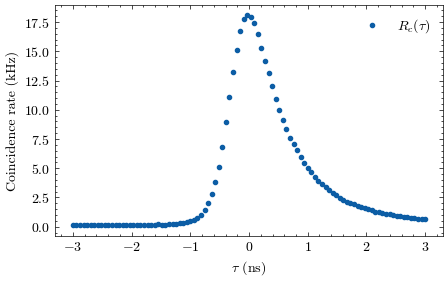

In [129]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(taus/1000, coinc_rates/1000, marker='.', label=r'$R_c(\tau)$', linestyle='none')
ax.set_xlabel(r'$\tau$ (ns)')
#ax.set_xlim(0, 1000)
ax.set_ylabel('Coincidence rate (kHz)')
ax.legend()

###plt.savefig('Day1/coincidence_rate_tau.pdf')
plt.show()

In [130]:
# np.save('npy/d1_coincidence_window_widths_tauc2', coincidence_window_widths)
# np.save('npy/d1_coinc_rates_tauc2', coinc_rates)
# np.save('npy/d1_coinc_counts_tauc2', coinc_counts)
# np.save('npy/d1_acc_coinc_rates_tauc2', acc_coinc_rates)

coincidence_window_widths = np.load('npy/d1_coincidence_window_widths_tauc2.npy')
coinc_rates = np.load('npy/d1_coinc_rates_tauc2.npy')
coinc_counts = np.load('npy/d1_coinc_counts_tauc2.npy')
acc_coinc_rates = np.load('npy/d1_acc_coinc_rates_tauc2.npy')

The last cell of this code section plots the coincidence
rate $R_c = N_c(τ_c)/t_{meas}$ (in blue) and the accidental count rate $R_{acc} = R_AR_Bτ_c$ (in
green) as a function of the coincidence window τc. Why do Rc and Racc look this
way?

We integrate over the Coincidence Counts per difference tau. Because this is poisson distributed, we get an integrated poisson that looks exactly like this. We expect the poisson to become constant from the moment on, where all the real coincidences have been measured and we just measure the noise. Therefore from this point on we get a linear function in the integrated graph. By finding the linear point on the $R_c$ we get the slope of the noise and can therefore construct our noiselevel. 

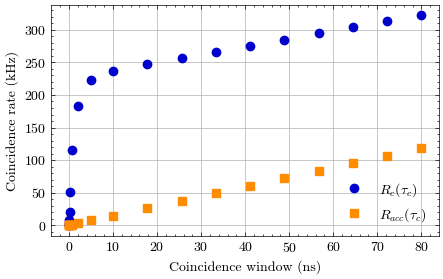

[1.92333370e+02 5.54333439e+02 1.27766691e+03 3.09266725e+03
 8.17433489e+03 2.03506705e+04 5.18330099e+04 1.15995689e+05
 1.83512035e+05 2.22586376e+05 2.36982045e+05 2.47685047e+05
 2.57134716e+05 2.66445051e+05 2.75754719e+05 2.85059054e+05
 2.94347056e+05 3.03638058e+05 3.12919393e+05 3.22235395e+05]


In [131]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(coincidence_window_widths/1000, coinc_rates/1000, marker='o', label=r'$R_c(\tau_c)$', linestyle='None', color='mediumblue')
ax.plot(coincidence_window_widths/1000, acc_coinc_rates/1000, marker='s', label=r'$R_{acc}(\tau_c)$', linestyle='None', color='darkorange')
ax.set_xlabel('Coincidence window (ns)')
ax.set_ylabel('Coincidence rate (kHz)')
ax.legend()
ax.grid()
#plt.savefig('Day1/coincidence_rate_tau_c.pdf')
plt.show()

print(coinc_rates)

### Your turn

We here substract R and R_acc to get R_c, the real coincidences. We see that there is a maximum at around 7-10 and choose 7.5 as our time intervall, where we interpret to counts as coincidences. (Why can we choose it?) 

10.0


<function matplotlib.pyplot.show(close=None, block=None)>

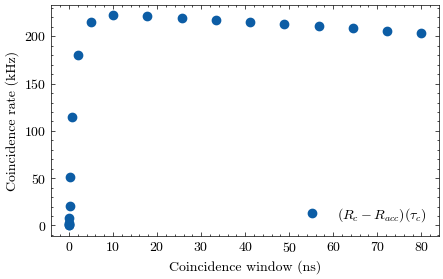

In [132]:

fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(coincidence_window_widths/1000, (coinc_rates-acc_coinc_rates)/1000, marker='o', label=r'$(R_c-R_{acc})(\tau_c)$', linestyle='None')

max_i = np.argmax(coinc_rates-acc_coinc_rates)
tau_c = coincidence_window_widths[max_i]
ax.set_xlabel('Coincidence window (ns)')
ax.set_ylabel('Coincidence rate (kHz)')
ax.legend()
print(tau_c/1000)

#ax.plot(tau_c,(coinc_rates-acc_coinc_rates)[max_i],label=r'$R_{max}$', color='red')
#plt.savefig('Day1/coincidence_rate_tau_c_diff.pdf')
plt.show

[] estimate the probability Pacc of identifying
a coincidence as a single-photon pair when it is really an accidental coincidence. In the
report, explain your calculation and your assumptons, and give the value

-> $R_{acc}(7500ps)/R_c(7500ps)=4.72\%$

P=4.72%


<function matplotlib.pyplot.show(close=None, block=None)>

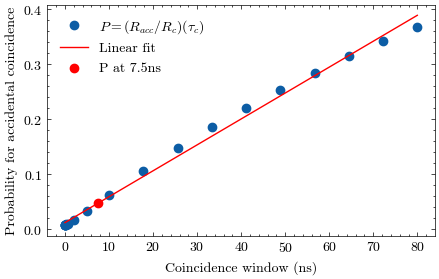

In [133]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(coincidence_window_widths/1000, (acc_coinc_rates/coinc_rates), marker='o', label=r'$P = (R_{acc}/R_c)(\tau_c)$', linestyle='None')

p_c = np.polyfit(coincidence_window_widths, acc_coinc_rates/coinc_rates, 1)
ax.plot(coincidence_window_widths/1000, p_c[0]*coincidence_window_widths + p_c[1], label='Linear fit', color='red')

P=p_c[0]*7500 + p_c[1]
ax.scatter(7.5, P, color='red', marker='o', label='P at 7.5ns')
print(f'P={P*100:.2f}%')

ax.set_xlabel('Coincidence window (ns)')
ax.set_ylabel('Probability for accidental coincidence')
ax.legend()

#ax.plot(tau_c,(coinc_rates-acc_coinc_rates)[max_i],label=r'$R_{max}$', color='red')
#plt.savefig('Day1/coincidence_rate_tau_c_ratio.pdf')
plt.show

## Coincidence Count $N_c$ with Respect to Pump Power $P$

In [134]:
# CHANGE to your chosen coincidence window (in ps)
coincidence_window_width_ps = 7500

In [135]:
# np.save('npy/d1_voltages_pumppower', voltages)
# np.save('npy/d1_coinc_rates_pumppower', coinc_rates)
# np.save('npy/d1_coinc_counts_pumppower', coinc_counts)
# np.save('npy/d1_acc_coinc_rates_pumppower', acc_coinc_rates)

voltages = np.load('npy/d1_voltages_pumppower.npy')
coinc_rates = np.load('npy/d1_coinc_rates_pumppower.npy')
coinc_counts = np.load('npy/d1_coinc_counts_pumppower.npy')
acc_coinc_rates = np.load('npy/d1_acc_coinc_rates_pumppower.npy')

In [136]:
print(voltages)
print(acc_coinc_rates)
print(coinc_counts,coinc_rates)

[ 18.2  31.8  31.9  89.1 150.4 210.7 270.  317.7]
[   20    82    95   940  2655  5048  8109 10780]
[ 30878  64034  68344 216305 357389 486081 608042 690524] [ 10292  21344  22781  72101 119129 162027 202680 230174]


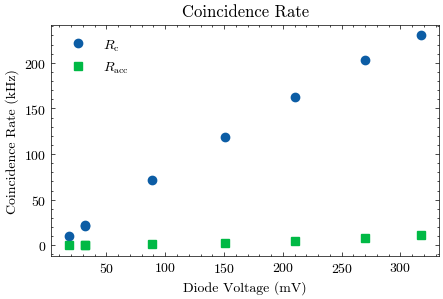

In [137]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(voltages, coinc_rates/1000, marker='o', label=r'$R_{\mathrm{c}}$', linestyle='none')
ax.plot(voltages, acc_coinc_rates/1000, marker='s', label=r'$R_{\mathrm{acc}}$', linestyle='none')
ax.set_title("Coincidence Rate")
ax.legend()
ax.set_xlabel(r'Diode Voltage (mV)')
ax.set_ylabel(r'Coincidence Rate (kHz)')

plt.show()

### Place for some curve fitting

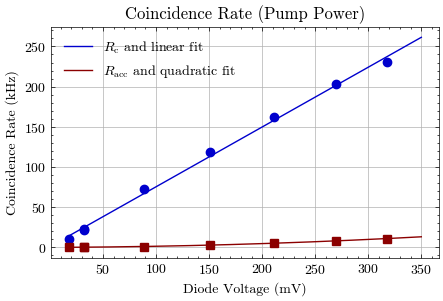

C:\Users\lsvon\AppData\Local\Temp\ipykernel_26392\2214032022.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


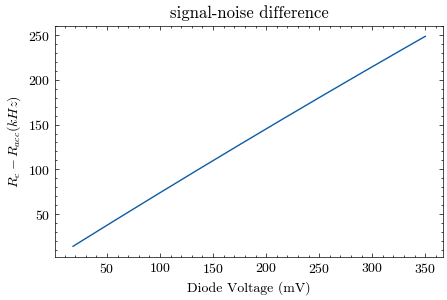

In [138]:
a_c = np.polyfit(voltages,coinc_rates,1)
a_acc = np.polyfit(voltages,acc_coinc_rates,2)
def p_c(x):
    return a_c[0]*x+a_c[1]
def p_acc(x):
    return a_acc[0]*x**2 + a_acc[1]*x + a_acc[2]
volts = np.linspace(18,350,350)

fig, ax = plt.subplots(figsize=(5,3))
ax.set_axisbelow(True)

ax.plot(volts, p_c(volts)/1000, label=r'$R_{\mathrm{c}}$ and linear fit', color='mediumblue')
ax.plot(voltages, coinc_rates/1000, marker='o', color='mediumblue', linestyle='none')
ax.plot(volts, p_acc(volts)/1000, label=r'$R_{\mathrm{acc}}$ and quadratic fit', color='darkred')
ax.plot(voltages, acc_coinc_rates/1000, marker='s', color='darkred', linestyle='none')
#ax.plot(volts,p_c(volts)/p_acc(volts))

ax.set_title("Coincidence Rate (Pump Power)")
ax.legend()
ax.set_xlabel(r'Diode Voltage (mV)')
ax.set_ylabel(r'Coincidence Rate (kHz)')
ax.grid()

#plt.savefig('Day1/coincidence_rate_voltage.pdf')
plt.show()

# Signal Noise Difference
fig, ax = plt.subplots(figsize=(5,3))
ax.set_axisbelow(True)

#ax.plot(volts, p_c(volts)/1000, label=r'$R_{\mathrm{c}}$')
#ax.plot(volts, p_acc(volts)/1000, label=r'$R_{\mathrm{acc}}$')
ax.plot(volts,(p_c(volts)-p_acc(volts))/1000)

ax.set_title("signal-noise difference")
ax.legend()
ax.set_xlabel(r'Diode Voltage (mV)')
ax.set_ylabel(r'$R_c - R_{acc} (kHz)$')

plt.show()

P=4.75%


<function matplotlib.pyplot.show(close=None, block=None)>

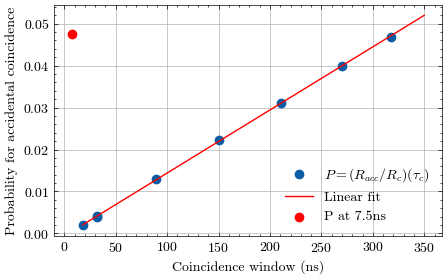

In [139]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(voltages, (acc_coinc_rates/coinc_rates), marker='o', label=r'$P = (R_{acc}/R_c)(\tau_c)$', linestyle='None')

p_c = np.polyfit(voltages, acc_coinc_rates/coinc_rates, 1)
ax.plot(volts, p_c[0]*volts + p_c[1], label='Linear fit', color='red')

P=p_c[0]*320 + p_c[1]
ax.scatter(7.5, P, color='red', marker='o', label='P at 7.5ns')
print(f'P={P*100:.2f}%')

ax.set_xlabel('Coincidence window (ns)')
ax.set_ylabel('Probability for accidental coincidence')
ax.legend()
ax.grid()

#ax.plot(tau_c,(coinc_rates-acc_coinc_rates)[max_i],label=r'$R_{max}$', color='red')
#plt.savefig('Day1/coincidence_rate_tau_c_ratio.pdf')
plt.show

## Coincidence Number $N_c$ with Respect to Polarization Direction $\vartheta$

In [140]:
# CHANGE to your chosen coincidence window (in ps)
coincidence_window_width_ps = 7500

In [141]:
# np.save('npy/d1_angles_angles', angles)
# np.save('npy/d1_coinc_rates_angles', coinc_rates)
# np.save('npy/d1_coinc_counts_angles', coinc_counts)
# np.save('npy/d1_acc_coinc_rates_angles', acc_coinc_rates)

angles = np.load('npy/d1_angles_angles.npy')
coinc_rates = np.load('npy/d1_coinc_rates_angles.npy')
coinc_counts = np.load('npy/d1_coinc_counts_angles.npy')
acc_coinc_rates = np.load('npy/d1_acc_coinc_rates_angles.npy')

In [142]:
print(angles, coinc_rates)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180.] [188315 172046 114330  70061  40027  20688   7747  29369  46995  71906
 116316 133383 171603 195583 210199 223414 216053 198653 162126]


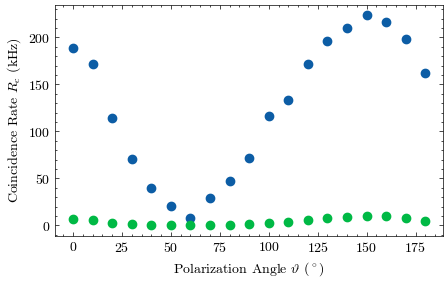

In [143]:
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(angles, coinc_rates/1000, marker='o', label=r'$N_c(\tau_c)$', linestyle='none')
ax.plot(angles, acc_coinc_rates/1000, marker='o', label=r'$N_c(\tau_c)$', linestyle='none')

ax.set_xlabel(r'Polarization Angle $\vartheta$ ($^\circ$)')
ax.set_ylabel(r'Coincidence Rate $R_c$ (kHz)')

plt.show()

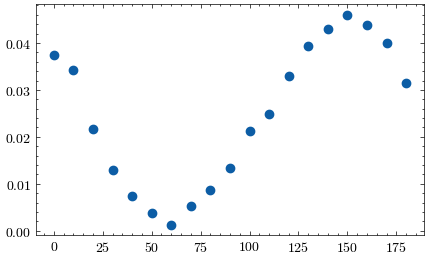

In [144]:
fig,ax = plt.subplots(figsize=(5,3))

ax.plot(angles, acc_coinc_rates/coinc_rates, marker='o', label=r'$P = (R_{acc}/R_c)(\tau_c)$', linestyle='None')

### Place for some curve fitting

We see a sine, which makes sense - the bbo only accepts one polarization direction, by turning the polarization we decrease the part of the polarization needed by the crystal by A*sin(kx+d) with A being the maximum $R_c$

[-103.56991754    2.08216867    0.67088546  120.9700808 ]
angle = 148.13348672656164 deg +- 2.4915745221137358 deg
Angle (data) = 148.13348672656164 deg


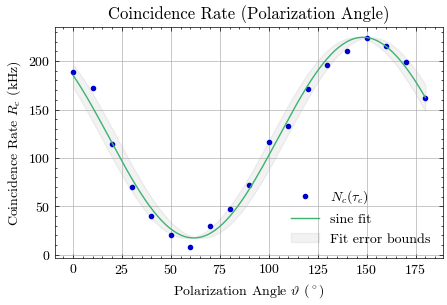

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def sine(x, A, B, C, D):
    return A * np.sin(B * x - C) + D

angles_rad = np.deg2rad(angles)
popt, pcov = optimize.curve_fit(sine, angles_rad, coinc_rates / 1000, p0=[87, 2, np.pi / 4, 125])

fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(angles, coinc_rates / 1000, marker='.', label=r'$N_c(\tau_c)$', linestyle='none', color='mediumblue')
ax.plot(np.linspace(0, 180, 180), sine(np.deg2rad(np.linspace(0, 180, 180)), *popt), label=r'sine fit', color='mediumseagreen')

# Calculate the fit with error margins
angles_fit = np.linspace(0, 180, 180)
angles_fit_rad = np.deg2rad(angles_fit)
fit_values = sine(angles_fit_rad, *popt)

# Calculate the error bounds
angle_error = np.deg2rad(4)  # 4 degrees in radians
upper_bound = sine(angles_fit_rad + angle_error, *popt)
lower_bound = sine(angles_fit_rad - angle_error, *popt)

# Fill the area between the error bounds
ax.fill_between(angles_fit, lower_bound, upper_bound, color='gray', alpha=0.1, label='Fit error bounds')

ax.legend()
ax.set_xlabel(r'Polarization Angle $\vartheta$ ($^\circ$)')
ax.set_ylabel(r'Coincidence Rate $R_c$ (kHz)')
ax.grid()
ax.set_title('Coincidence Rate (Polarization Angle)')

max_angle_fit = (popt[2]+3*np.pi/2)/popt[1] 
max_angle_error = np.sqrt((pcov[2,2])/popt[1]**2 + (max_angle_fit**2 * pcov[1,1])/popt[1]**2)
max_angle_data = np.rad2deg(max_angle_fit)


print(popt)
print(rf'angle = {np.rad2deg(max_angle_fit)} deg +- {np.rad2deg(max_angle_error)} deg')
print(rf'Angle (data) = {max_angle_data} deg')
#plt.savefig('Day1/coincidence_rate_angle.pdf')
plt.show()

# Day 2


In [146]:
import os
import io

import numpy as np
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm
from scipy import optimize

from utils import fileio, coincidence_calcs

import scienceplots
plt.style.use(['science', 'no-latex'])

#load_ext autoreload
#autoreload 2

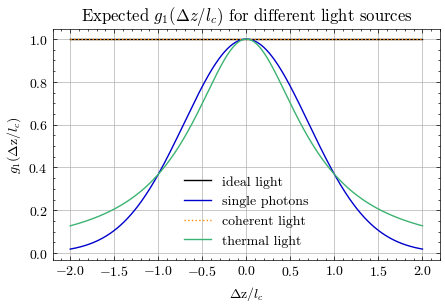

In [147]:
fig, ax = plt.subplots(figsize=(5,3))
dx = np.linspace(-2,2,400)

def gaussian(x, sigma):
    return np.exp(- (10*x) ** 2 / ( sigma ** 2))

def constant(x):
    return x/x

def lorentzian(x, gamma):
    return 1/(1 + (10*x) ** 2 / (gamma ** 2))

sigma = 10
gamma = np.sqrt(100 / (np.exp(100 / sigma**2) - 1))

ax.plot(dx, constant(dx), label='ideal light', color='black')
ax.plot(dx, gaussian(dx, sigma), label='single photons', color='mediumblue')
ax.plot(dx, gaussian(dx, 10000000), label='coherent light', linestyle='dotted', color='darkorange')
ax.plot(dx, lorentzian(dx, gamma), label='thermal light', color='mediumseagreen')

ax.legend()
ax.grid()
ax.set_xlabel(r'$\Delta$z/$l_c$')
ax.set_ylabel(r'$g_1(\Delta$z/$l_c$)')
ax.set_title(r'Expected $g_1(\Delta z/l_c)$ for different light sources')
#plt.savefig('Day2/g1_light_sources.pdf')
plt.show()

## g1 Single Photon old

In [148]:
# CHANGE TO CHOSEN COINCIDENCE WINDOW
coinc_window = 7500 # in ps

In [149]:
# np.save('npy/g1_single_photons_voltages', voltages_fixed)
# np.save('npy/g1_single_photons_coinc_rates', coinc_rates_fixed)
voltages_fixed = np.load('npy/d2_g1_single_photons_voltages_old.npy')
coinc_rates_fixed = np.load('npy/d2_g1_single_photons_coinc_rates_old.npy')

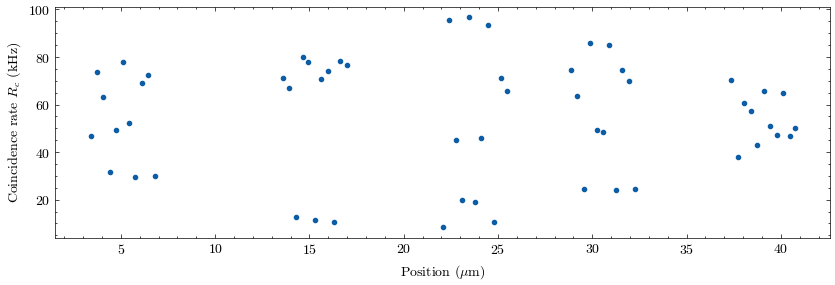

In [150]:
calibration = 679.4     # piezo stage calibration nm/V
position = calibration*voltages_fixed

# Make plot
fig, ax = plt.subplots(figsize=(10,3))

ax.set_axisbelow(True)
ax.plot(position/1e3, coinc_rates_fixed/1e3, marker='.', label=r'$R_{\mathrm{c}}$', linestyle='none')
ax.set_xlabel(r'Position ($\mu$m)')
ax.set_ylabel(r'Coincidence rate $R_c$ (kHz)')

#plt.savefig('Day2/g1_single_photon_single_points.pdf')

plt.show()

### Curve Fitting

g1 = 0.42 +- 0.03
mylambda = 1.25 +- 0.02
x0 = 51.43 +- 0.67
Rmean = 54.84 +- 1.17


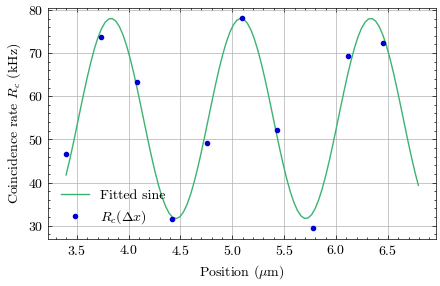

g1 = 0.78 +- 0.03
mylambda = 1.02 +- 0.01
x0 = 45.75 +- 0.17
Rmean = 52.93 +- 1.06


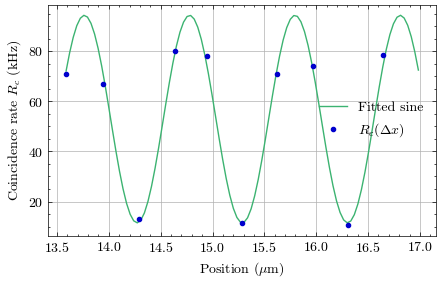

g1 = 0.90 +- 0.02
mylambda = 0.94 +- 0.00
x0 = 36.11 +- 0.05
Rmean = 52.62 +- 0.79


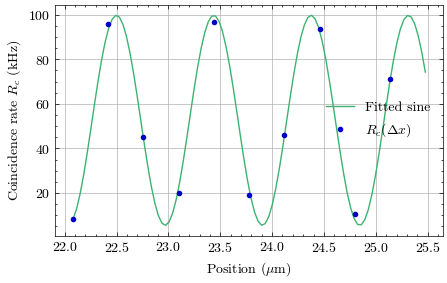

g1 = 0.57 +- 0.04
mylambda = 0.91 +- 0.01
x0 = 35.39 +- 0.04
Rmean = 57.45 +- 1.34


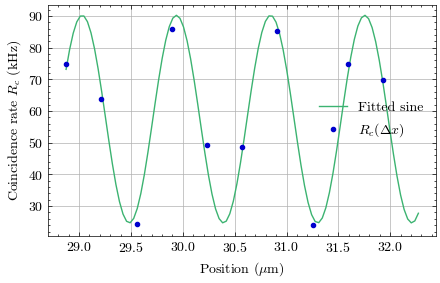

g1 = 0.25 +- 0.03
mylambda = 0.95 +- 0.02
x0 = 35.38 +- 0.07
Rmean = 54.34 +- 1.00


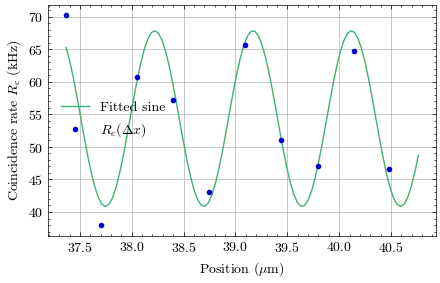

g1 = [0.42302396 0.7831337  0.89663384 0.56995591 0.24838441]


In [151]:
from scipy import optimize

def sine_fitted(x,g1,mylambda,x0,Rmean):
    return Rmean*(1+g1*np.cos(2*np.pi/mylambda* (x-x0)))

g1_array = np.zeros(5,)
g1_error_array = np.zeros(5,)

#could be optimized to include i=4 in loop, then the boundary conditions would have to be dependend on i to match good condition for i=4 which was the initial problem. 
# code in loop and after is identical
for i in range(4):
    fig, ax = plt.subplots(figsize=(5,3))

    v_min_idx = i*11
    v_max_idx = (i+1)*11-1
    p_min = position[v_min_idx]/1000
    p_max = position[v_max_idx]/1000

    popt, pcov = optimize.curve_fit(sine_fitted, 
                                    position[v_min_idx:v_max_idx]/1000, 
                                    coinc_rates_fixed[v_min_idx:v_max_idx]/1000,
                                    p0=[np.exp(-(i-2)**2),0.795,35,50]
                                    )
    
    ax.plot(np.linspace(p_min,p_max,100), 
            sine_fitted(np.linspace(p_min, p_max, 100), *popt),
            label='Fitted sine', color='mediumseagreen'
            )
    

    ax.plot(position[v_min_idx:v_max_idx]/1000, 
            coinc_rates_fixed[v_min_idx:v_max_idx]/1000, 
            marker='.', label=fr'$R_c(\Delta x)$', linestyle='none', color='mediumblue'
            )

    g1_array[i] = np.abs(popt[0])
    g1_error_array[i] = np.sqrt(pcov[0][0])

    ax.set_axisbelow(True)
    ax.set_xlabel(r'Position ($\mu$m)')
    ax.set_ylabel(r'Coincidence rate $R_c$ (kHz)')
    ax.grid()
    ax.legend()

    print(f'g1 = {g1_array[i]:.2f} +- {g1_error_array[i]:.2f}')
    print(f'mylambda = {popt[1]:.2f} +- {np.sqrt(pcov[1][1]):.2f}')
    print(f'x0 = {popt[2]:.2f} +- {np.sqrt(pcov[2][2]):.2f}')
    print(f'Rmean = {popt[3]:.2f} +- {np.sqrt(pcov[3][3]):.2f}')

    #plt.savefig(f'Day2/g1_single_photon_single_sine_fit{i}.pdf')
    plt.show()

fig, ax = plt.subplots(figsize=(5,3))

i=4
v_min_idx = i*11
v_max_idx = (i+1)*11-1
p_min = position[v_min_idx]/1000
p_max = position[v_max_idx]/1000

popt, pcov = optimize.curve_fit(sine_fitted, 
                                position[v_min_idx:v_max_idx]/1000, 
                                coinc_rates_fixed[v_min_idx:v_max_idx]/1000,
                                p0=[0.3,1,35,50]
                                )

ax.plot(np.linspace(p_min,p_max,100), 
        sine_fitted(np.linspace(p_min, p_max, 100), *popt),
        label='Fitted sine', color='mediumseagreen'
        )

ax.plot(position[v_min_idx:v_max_idx]/1000, 
        coinc_rates_fixed[v_min_idx:v_max_idx]/1000, 
        marker='.', label=rf'$R_c(\Delta x)$', linestyle='none',color='mediumblue'
        )

g1_array[i] = np.abs(popt[0])
g1_error_array[i] = np.sqrt(pcov[0][0])

ax.set_xlabel(r'Position ($\mu$m)')
ax.set_ylabel(r'Coincidence rate $R_c$ (kHz)')
ax.grid()
ax.legend()


print(f'g1 = {g1_array[i]:.2f} +- {g1_error_array[i]:.2f}')
print(f'mylambda = {popt[1]:.2f} +- {np.sqrt(pcov[1][1]):.2f}')
print(f'x0 = {popt[2]:.2f} +- {np.sqrt(pcov[2][2]):.2f}')
print(f'Rmean = {popt[3]:.2f} +- {np.sqrt(pcov[3][3]):.2f}')

#plt.savefig(f'Day2/g1_single_photon_single_sine_fit{i}.pdf')
plt.show()

print('g1 =', g1_array)

g1 = 0.42 +- 0.03
mylambda = 1.25 +- 0.02
x0 = 51.43 +- 0.67
Rmean = 54.84 +- 1.17
g1 = 0.78 +- 0.03
mylambda = 1.02 +- 0.01
x0 = 45.75 +- 0.17
Rmean = 52.93 +- 1.06
g1 = 0.90 +- 0.02
mylambda = 0.94 +- 0.00
x0 = 36.11 +- 0.05
Rmean = 52.62 +- 0.79
g1 = 0.57 +- 0.04
mylambda = 0.91 +- 0.01
x0 = 35.39 +- 0.04
Rmean = 57.45 +- 1.34
g1 = 0.25 +- 0.03
mylambda = 0.95 +- 0.02
x0 = 35.38 +- 0.07
Rmean = 54.34 +- 1.00


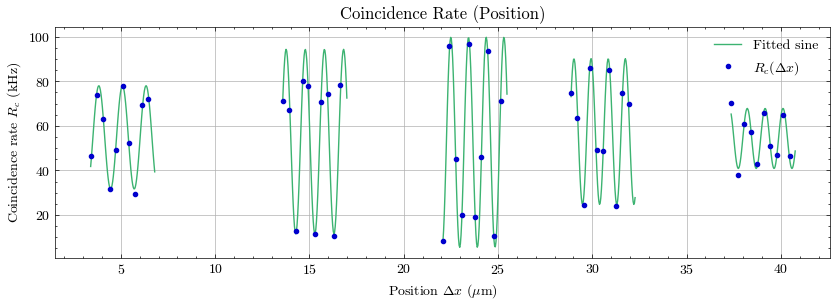

g1 = [0.42302396 0.7831337  0.89663384 0.56995591 0.24838441]


In [152]:
from scipy import optimize

def sine_fitted(x,g1,mylambda,x0,Rmean):
    return Rmean*(1+g1*np.cos(2*np.pi/mylambda*(x-x0)))

g1_array = np.zeros(5,)
g1_error_array = np.zeros(5,)

#could be optimized to include i=4 in loop, then the boundary conditions would have to be dependend on i to match good condition for i=4 which was the initial problem. 
# code in loop and after is identical
fig, ax = plt.subplots(figsize=(10,3))
for i in range(4):

    v_min_idx = i*11
    v_max_idx = (i+1)*11-1
    p_min = position[v_min_idx]/1000
    p_max = position[v_max_idx]/1000

    popt, pcov = optimize.curve_fit(sine_fitted, 
                                    position[v_min_idx:v_max_idx]/1000, 
                                    coinc_rates_fixed[v_min_idx:v_max_idx]/1000,
                                    p0=[np.exp(-(i-2)**2),0.795,35,50]
                                    )
    
    ax.plot(np.linspace(p_min,p_max,100), 
            sine_fitted(np.linspace(p_min, p_max, 100), *popt),
                color='mediumseagreen'
            )
    

    ax.plot(position[v_min_idx:v_max_idx]/1000, 
            coinc_rates_fixed[v_min_idx:v_max_idx]/1000, 
            marker='.', linestyle='none', color='mediumblue'
            )

    g1_array[i] = np.abs(popt[0])
    g1_error_array[i] = np.sqrt(pcov[0][0])

    ax.set_axisbelow(True)
    ax.set_xlabel(r'Position $\Delta x$ ($\mu$m)')
    ax.set_ylabel(r'Coincidence rate $R_c$ (kHz)')
    ax.grid()

    print(f'g1 = {g1_array[i]:.2f} +- {g1_error_array[i]:.2f}')
    print(f'mylambda = {popt[1]:.2f} +- {np.sqrt(pcov[1][1]):.2f}')
    print(f'x0 = {popt[2]:.2f} +- {np.sqrt(pcov[2][2]):.2f}')
    print(f'Rmean = {popt[3]:.2f} +- {np.sqrt(pcov[3][3]):.2f}')

i=4
v_min_idx = i*11
v_max_idx = (i+1)*11-1
p_min = position[v_min_idx]/1000
p_max = position[v_max_idx]/1000

popt, pcov = optimize.curve_fit(sine_fitted, 
                                position[v_min_idx:v_max_idx]/1000, 
                                coinc_rates_fixed[v_min_idx:v_max_idx]/1000,
                                p0=[0.3,1,35,50]
                                )

ax.plot(np.linspace(p_min,p_max,100), 
        sine_fitted(np.linspace(p_min, p_max, 100), *popt),
        label='Fitted sine', color='mediumseagreen'
        )

ax.plot(position[v_min_idx:v_max_idx]/1000, 
        coinc_rates_fixed[v_min_idx:v_max_idx]/1000, 
        marker='.', label=rf'$R_c(\Delta x)$', linestyle='none',color='mediumblue'
        )

g1_array[i] = np.abs(popt[0])
g1_error_array[i] = np.sqrt(pcov[0][0])

ax.set_xlabel(r'Position $\Delta x$ ($\mu$m)')
ax.set_ylabel(r'Coincidence rate $R_c$ (kHz)')
ax.grid()
ax.legend()
ax.set_title('Coincidence Rate (Position)')

print(f'g1 = {g1_array[i]:.2f} +- {g1_error_array[i]:.2f}')
print(f'mylambda = {popt[1]:.2f} +- {np.sqrt(pcov[1][1]):.2f}')
print(f'x0 = {popt[2]:.2f} +- {np.sqrt(pcov[2][2]):.2f}')
print(f'Rmean = {popt[3]:.2f} +- {np.sqrt(pcov[3][3]):.2f}')

#plt.savefig(f'Day2/g1_single_photon_single_sine_fit_all.pdf')
plt.show()

print('g1 =', g1_array)

positions: [ 5.0955   15.2865   23.779    30.573    39.092676],
 g1_array: [0.42302396 0.7831337  0.89663384 0.56995591 0.24838441],
 g1_error_array: [0.0322423  0.03353495 0.02373113 0.03898276 0.0253009 ]
g1amp = 0.91 +- 0.02
sigma = 11.73 +- 0.40
x0 = 20.20 +- 0.40


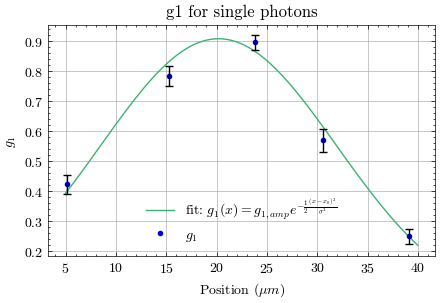

In [153]:
#Unbedingt sigma in Kohärenzlänge übertragen
def exp_fitted(x,g1amp,sigma,x0):
    return g1amp*np.exp(-0.5*((x-x0))**2/sigma**2)

position_for_opt = np.array([position[k*11+5] for k in range(5)])/1000

print(f'positions: {position_for_opt},\n g1_array: {g1_array},\n g1_error_array: {g1_error_array}')

popt2, pcov2 = optimize.curve_fit(exp_fitted, position_for_opt, g1_array, p0=[1,30,np.sqrt(33)], sigma = g1_error_array, absolute_sigma=True)

print(f'g1amp = {popt2[0]:.2f} +- {np.sqrt(pcov2[0][0]):.2f}')
print(f'sigma = {popt2[1]:.2f} +- {np.sqrt(pcov2[1][1]):.2f}')
print(f'x0 = {popt2[2]:.2f} +- {np.sqrt(pcov2[2][2]):.2f}')

fig, ax = plt.subplots(figsize=(5,3))

ax.plot(np.linspace(5,40,100),
        exp_fitted(np.linspace(5,40,100),*popt2), 
         color = 'mediumseagreen', label='fit: $g_1(x)=g_{1,amp}e^{- \\frac{1}{2} \\frac{(x-x_0)^2}{\\sigma^2}}$',
        )

ax.plot(position_for_opt, g1_array, marker='.', linestyle = 'none', label='$g_1$', color='mediumblue')

ax.errorbar(position_for_opt, g1_array, yerr=g1_error_array, fmt='none', capsize=3, color='black', zorder=2)


ax.set_xlabel(r'Position ($\mu m$)')
ax.set_ylabel(r'$g_1$')
ax.legend()
ax.set_title('g1 for single photons')
ax.grid()

#plt.savefig('Day2/g1_single_photon_g1_fit.pdf')
plt.show()

Find maximum.

In [154]:
print(f'g1={popt2[0]:.2f}±{np.sqrt(pcov2[0][0]):.2f}')

g1=0.91±0.02


Find $l_c$, $\Delta\lambda_c$ and $t_c$:

$t_c = l_c/c$

$\Delta\lambda_c= \frac{\sqrt{2ln2}\lambda^2}{ct_c }$

$g_1(x)=g_{1,amp}e^{- \frac{1}{2} \frac{(x-x_0)^2}{\sigma^2}}$

Wenn das gleich 1/e sein soll, muss
$x-x_0 = \sqrt{2}\sigma$ also 
$x = x_0 +  \sqrt{2}\sigma$ sein.
Daraus folgt:


In [155]:
print(f'l_c = {np.sqrt(2)*popt2[1]:.2f}±{np.sqrt(2)*np.sqrt(pcov2[1][1]):.2f} µm')
t_c = np.sqrt(2)*popt2[1]/3e8*1e9
dt_c = np.sqrt(2)*np.sqrt(pcov2[1][1])/3e8*1e9
#lambda_c = np.sqrt(2*np.log(2))*(795*1e-9)**2/(3e8*t_c)
#dlambda_c = np.sqrt(2*np.log(2))*(795*1e-9)**2/(3e8*t_c**2)*dt_c
print(f't_c = {t_c:.2f}±{dt_c:.2f} ns')


l_c = 16.59±0.56 µm
t_c = 55.31±1.86 ns


## g1 coherent new


### File Conversion

In [156]:
voltages_fixed = np.load('npy/d2_g1_coherent_voltages.npy')
count_rates_fixed = np.load('npy/d2_g1_coherent_count_rates.npy')

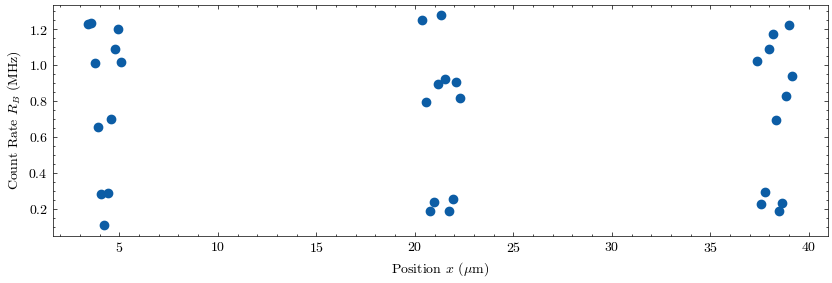

In [157]:
calibration = 679.4     # piezo stage calibration nm/V
position = calibration*voltages_fixed
count_rates = count_rates_fixed

# Make plot
fig, ax = plt.subplots(figsize=(10,3))

ax.set_axisbelow(True)
ax.plot(position/1000, count_rates/1e6, marker='o', linestyle='none')
ax.set_xlabel(r'Position $x$ ($\mu$m)')
ax.set_ylabel(r'Count Rate $R_B$ (MHz)')

#plt.savefig('Day2/g1_coherent.pdf')

plt.show()

### Curve Fitting

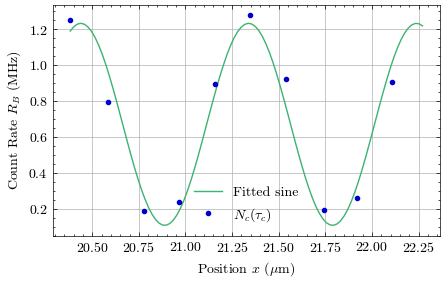

[ 0.84076836  0.9        19.53851756  0.67006542] 
 [[ 0.00925066 -0.00036308  0.00072922 -0.00215652]
 [-0.00036308  0.00058825 -0.00114703  0.00027461]
 [ 0.00072922 -0.00114703  0.00243021 -0.00049912]
 [-0.00215652  0.00027461 -0.00049912  0.00158738]]


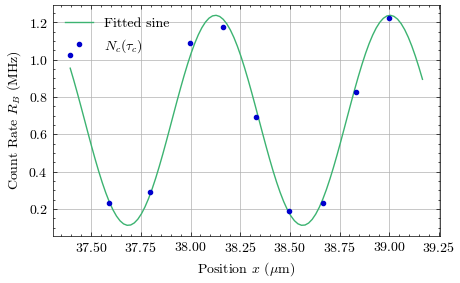

[ 0.83446032  0.87835073 17.92349015  0.674643  ] 
 [[ 1.58522814e-03 -4.90652396e-05  1.13214768e-03 -3.76766396e-04]
 [-4.90652396e-05  1.17832651e-04 -2.71445819e-03  6.96586003e-05]
 [ 1.13214768e-03 -2.71445819e-03  6.25642942e-02 -1.60606055e-03]
 [-3.76766396e-04  6.96586003e-05 -1.60606055e-03  2.98220436e-04]]


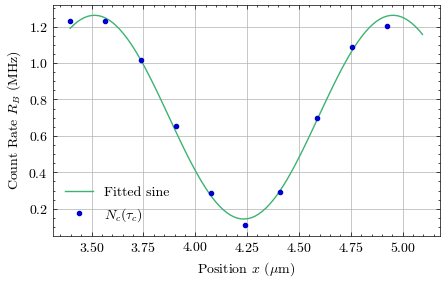

[ 0.79578652  1.43894389 15.02558108  0.70283842] 
 [[ 0.00090092 -0.00029095 -0.0021866  -0.0002863 ]
 [-0.00029095  0.00089992  0.00678762  0.00023942]
 [-0.0021866   0.00678762  0.05124729  0.00180983]
 [-0.0002863   0.00023942  0.00180983  0.00020497]]


In [158]:
#why is one g1 always badly optimized? -> Bounds optimieren

from scipy import optimize

def sine_fitted(x,g1,mylambda,x0,Rmean):
    return Rmean*(1+g1*np.cos(2*np.pi/mylambda* (x-x0)))


for i in [1,2]:
    fig, ax = plt.subplots(figsize=(5,3))
    p_min = 11*i
    p_max = (i+1)*11-1
    popt, pcov = optimize.curve_fit(sine_fitted, position[p_min:p_max]/1000, count_rates_fixed[p_min:p_max]/1e6,
                                    p0=[0.7,0.795,20,2.5],
                                    bounds=([0,0.6,10,0],[1,0.9,30,3]))
    
    ax.plot(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
            sine_fitted(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
                         *popt),
            label='Fitted sine', color='mediumseagreen')
    
    ax.plot(position[p_min:p_max]/1000, count_rates_fixed[p_min:p_max]/1e6, marker='.', label=r'$N_c(\tau_c)$', linestyle='none', color='mediumblue')
    ax.set_xlabel(r'Position $x$ ($\mu$m)')
    ax.set_ylabel(r'Count Rate $R_B$ (MHz)')
    ax.legend()
    ax.grid()

    plt.show()
    print(popt,'\n',pcov)

fig, ax = plt.subplots(figsize=(5,3))
p_min = 0
p_max = 10
popt, pcov = optimize.curve_fit(sine_fitted, position[p_min:p_max]/1000, count_rates_fixed[p_min:p_max]/1e6,
                                p0=[0.7,2,20,2.5],
                                bounds=([0,0.2,10,0],[1,3,30,3]))

ax.plot(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
        sine_fitted(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
                        *popt),
                        label='Fitted sine', color='mediumseagreen')

ax.plot(position[p_min:p_max]/1000, count_rates_fixed[p_min:p_max]/1e6, marker='.', label=r'$N_c(\tau_c)$', linestyle='none', color='mediumblue')
ax.set_xlabel(r'Position $x$ ($\mu$m)')
ax.set_ylabel(r'Count Rate $R_B$ (MHz)')
ax.grid()
ax.legend()
plt.show()
print(popt,'\n',pcov)


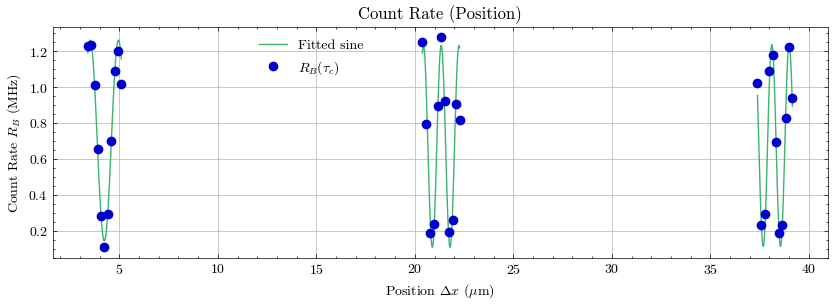

In [159]:
#why is one g1 always badly optimized? -> Bounds optimieren

from scipy import optimize

def sine_fitted(x,g1,mylambda,x0,Rmean):
    return Rmean*(1+g1*np.cos(2*np.pi/mylambda* (x-x0)))

g1_array = np.zeros(3,)
g1_error_array = np.zeros(3,)
fig, ax = plt.subplots(figsize=(10,3))

for i in [1,2]:
    p_min = 11*i
    p_max = (i+1)*11-1
    popt, pcov = optimize.curve_fit(sine_fitted, position[p_min:p_max]/1000, count_rates_fixed[p_min:p_max]/1e6,
                                    p0=[0.7,0.795,20,2.5],
                                    bounds=([0,0.6,10,0],[1,0.9,30,3]))
    
    ax.plot(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
            sine_fitted(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
                         *popt),
                         color='mediumseagreen')
    g1_array[i] = popt[0]
    g1_error_array[i] = np.sqrt(pcov[0][0])
    
p_min = 0
p_max = 10
popt, pcov = optimize.curve_fit(sine_fitted, position[p_min:p_max]/1000, count_rates_fixed[p_min:p_max]/1e6,
                                p0=[0.7,2,20,2.5],
                                bounds=([0,0.2,10,0],[1,3,30,3]))

ax.plot(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
        sine_fitted(np.linspace(position[p_min]/1000, position[p_max]/1000, 100),
                        *popt),
                        label='Fitted sine', color='mediumseagreen')

g1_array[0] = popt[0]
g1_error_array[0] = np.sqrt(pcov[0][0])

ax.plot(position/1000, count_rates_fixed/1e6, marker='o', label=r'$R_B(\tau_c)$', linestyle='none', color='mediumblue')
ax.set_xlabel(r'Position $\Delta x$ ($\mu$m)')
ax.set_ylabel(r'Count Rate $R_B$ (MHz)')
ax.legend(loc='upper left', bbox_to_anchor=(0.25,1))
ax.grid()
ax.set_title('Count Rate (Position)')

#plt.savefig('Day2/g1_coherent_sine_fit.pdf')
plt.show()

In [160]:
g1_mean = np.mean(g1_array)
g1_error_propagation = np.sqrt(np.sum(g1_error_array**2))/3
print(f'g1 = {g1_mean:.2f} +- {g1_error_propagation:.2f}')

g1 = 0.82 +- 0.04


positions: [ 4.239456 21.346748 38.331748],
 g1_array: [0.79578652 0.84076836 0.83446032],
 g1_error_array: [0.03001527 0.09618035 0.03981492]


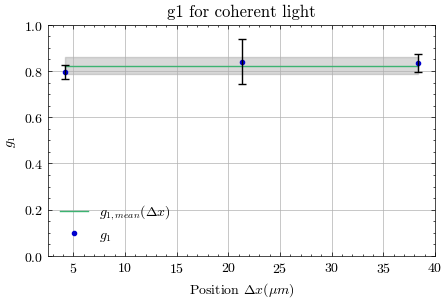

In [161]:
position_for_opt = np.array([position[k*11+5] for k in range(3)])/1000

print(f'positions: {position_for_opt},\n g1_array: {g1_array},\n g1_error_array: {g1_error_array}')

#p = np.polyfit(position_for_opt, g1_array,1)

#print(f'g1amp = {popt2[0]:.2f} +- {np.sqrt(pcov2[0][0]):.2f}')
#print(f'sigma = {popt2[1]:.2f} +- {np.sqrt(pcov2[1][1]):.2f}')
#print(f'x0 = {popt2[2]:.2f} +- {np.sqrt(pcov2[2][2]):.2f}')

fig, ax = plt.subplots(figsize=(5,3))

#ax.plot(np.linspace(0,40,100),
#        p[0]*np.linspace(0,40,100)+p[1], 
#         color = 'mediumseagreen', label='linear fit',
#        )

ax.plot(position_for_opt, 3*[g1_mean], color='mediumseagreen', label=r'$g_{1,mean}(\Delta x)$')
ax.fill_between(position_for_opt, g1_mean-g1_error_propagation, g1_mean+g1_error_propagation, color='gray', alpha=0.3)
ax.plot(position_for_opt, g1_array, marker='.', linestyle = 'none', label='$g_1$', color='mediumblue')

ax.errorbar(position_for_opt, g1_array, yerr=g1_error_array, fmt='none', capsize=3, color='black', zorder=2)


ax.set_xlabel(r'Position $\Delta x(\mu m$)')
ax.set_ylabel(r'$g_1$')
ax.set_ylim(0,1)
ax.legend()
ax.set_title('g1 for coherent light')
ax.grid()

#plt.savefig('Day2/g1_coherent_g1_fit.pdf')
plt.show()

# Day 3

## g2 for Coherent Light

In [162]:
filename = 'coherent_180s.ptu'

In [163]:
#np.save(f'npy/d3_{filename[:-4]}_tau_arr', tau_arr)
#np.save(f'npy/d3_{filename[:-4]}_g2', g2)

In [164]:
#tau_arr = np.load(f'npy/d3_{filename[:-4]}_tau_arr.npy')
g2 = np.load(f'npy/d3_{filename[:-4]}_g2.npy')

In [165]:
tau_bin_size = 300
tau_max = 20*tau_bin_size
tau_arr = np.arange(-tau_max, tau_max+1, tau_bin_size)

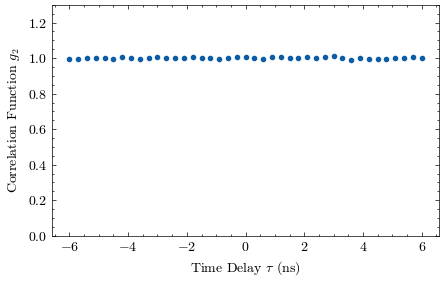

In [166]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(tau_arr/1e3, g2, marker='.', label=r'$R_{\mathrm{c}}$', linestyle='none')
ax.set_xlabel(r'Time Delay $\tau$ (ns)')
ax.set_ylabel(r'Correlation Function $g_2$')
ax.set_ylim(0,1.3)

#plt.savefig('Day3/g2_coherent.pdf')

plt.show()

### Fitting time

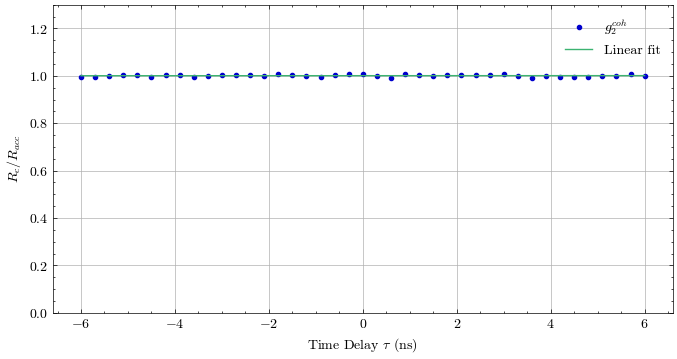

[2.82777842e-05 1.00084468e+00] [[ 3.96994726e-08 -4.88678628e-24]
 [-4.88678628e-24  5.00224955e-07]]
g2 = 1.00 +- 0.00
slope = 0.00 +- 0.00
offset = 1.00 +- 0.00


In [167]:
def g_2_coherent_fit(x, A, B):
    return A*x + B

popt, pcov = optimize.curve_fit(g_2_coherent_fit, tau_arr/1e3, g2, p0= [0,1])

fig1 = plt.figure(figsize=(8,4))
subplot = fig1.add_subplot(1,1,1)
subplot.plot(tau_arr/1e3, g2, marker='.', label=r'$g_2^{coh}$', linestyle='none', color='mediumblue')
subplot.plot(tau_arr/1e3, g_2_coherent_fit(tau_arr/1e3, *popt), label='Linear fit', color='mediumseagreen')
subplot.set_ylim(0,1.3)
subplot.set_xlabel(r'Time Delay $\tau$ (ns)')
subplot.set_ylabel(r'$R_c/R_{acc}$')
subplot.legend()
subplot.grid()
#plt.savefig('Day3/g2_coherent_fit.pdf')
plt.show()
print(popt, pcov)

print(f'g2 = {popt[1]:.2f} +- {np.sqrt(pcov[1][1]):.2f}')
print(f'slope = {popt[0]:.2f} +- {np.sqrt(pcov[0][0]):.2f}')
print(f'offset = {popt[1]:.2f} +- {np.sqrt(pcov[1][1]):.2f}')


## g2 single photon 30s

In [168]:
coinc_window_ps = 5000

tau_bin_size = 2500
tau_max = 15*tau_bin_size
tau_arr = np.arange(-tau_max, tau_max+1, tau_bin_size)

In [169]:
# np.save('npy/d3_single_photons_30s_g2', g2)
# np.save('npy/d3_single_photons_30s_RABBp_tau', RABBp_tau)
# np.save('npy/d3_single_photons_30s_RABp_tau', RABp_tau)


g2 = np.load('npy/d3_single_photons_30s_g2.npy')
RABBp_tau = np.load('npy/d3_single_photons_30s_RABBp_tau.npy')
RABp_tau = np.load('npy/d3_single_photons_30s_RABp_tau.npy')

# Total N_A Counts: 28876563
# Total N_B Counts: 7220170
# Total N_Bp Counts: 7964124
# Total Measurement Time: 29.999998971109
# Number of N_AB Coincidences: 1202530


In [170]:
#Manuell übernommen
NA = 28876563
NB = 7220170
NBp = 7964124
meas_time = 29.999998971109
NAB = 1202530

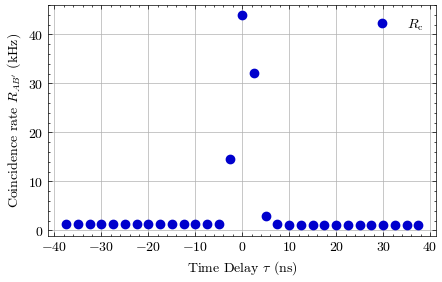

In [171]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(tau_arr/1e3, RABp_tau/1e3, marker='o', label=r'$R_{\mathrm{c}}$', linestyle='none', color='mediumblue')
ax.set_xlabel(r'Time Delay $\tau$ (ns)')
ax.set_ylabel(r'Coincidence rate $R_{AB^\prime}$ (kHz)')
ax.legend()
ax.grid()

#plt.savefig('Day3/g2_single_photons_RABp.pdf')

plt.show()

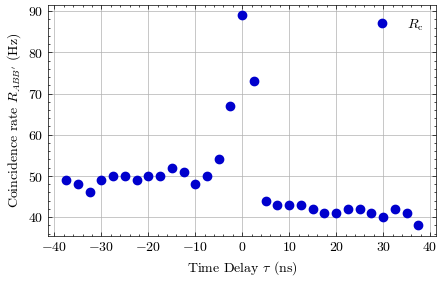

In [172]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(tau_arr/1e3, RABBp_tau, marker='o', label=r'$R_{\mathrm{c}}$', linestyle='none', color='mediumblue')
ax.set_xlabel(r'Time Delay $\tau$ (ns)')
ax.set_ylabel(r'Coincidence rate $R_{ABB^\prime}$ (Hz)')
ax.legend()
ax.grid()

#plt.savefig('Day3/g2_single_photons_RABBp.pdf')

plt.show()

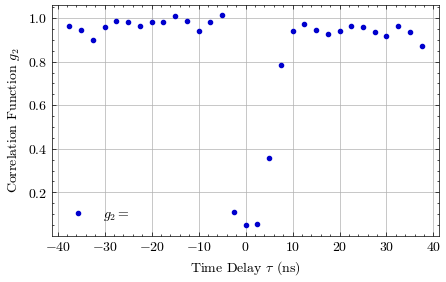

In [173]:
g2 = RABBp_tau/RABp_tau*NA/NAB

fig, ax = plt.subplots(figsize=(5,3))

ax.set_axisbelow(True)
ax.plot(tau_arr/1e3, g2, marker='.', label=r'$g_2 = $', linestyle='none', color='mediumblue')
ax.set_xlabel(r'Time Delay $\tau$ (ns)')
ax.set_ylabel(r'Correlation Function $g_2$')
ax.legend()
ax.grid()

#plt.savefig('Day3/g2_single_photons_g2.pdf')

plt.show()

Code Fitting

### Curve Fitting

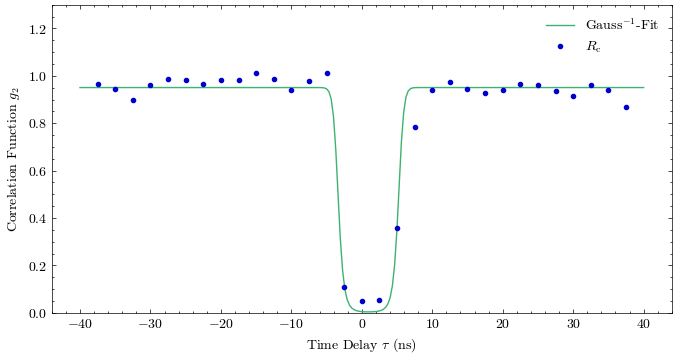

[  0.95073287 248.50363776   0.93024319   1.28465789] 
 [[ 8.38800393e-05 -1.28502056e+00 -3.99775589e-04  8.07507341e-04]
 [-1.28502056e+00  8.35402898e+05  2.44433521e+02 -5.08057678e+02]
 [-3.99775589e-04  2.44433521e+02  8.68484910e-02 -1.52446801e-01]
 [ 8.07507341e-04 -5.08057678e+02 -1.52446801e-01  3.10573925e-01]]


In [174]:
def g2_single_fit(tau,A,B,tau0,sigma):
    return A*(1/(B*np.exp(-(tau-tau0)**2/(2*sigma**2))+1)) #A=R_ABB'*R_A/(R_AB*B)

popt,pcov = optimize.curve_fit(g2_single_fit,tau_arr/1e3,g2,p0=[1,48,0,1.5])

fig1 = plt.figure(figsize=(8,4))
subplot = fig1.add_subplot(1,1,1)

tau_linspace = np.linspace(-40,40,250)

subplot.plot(tau_linspace, g2_single_fit(tau_linspace, *popt), label=r'$\text{Gauss}^{-1}$-Fit', color='mediumseagreen')

subplot.plot(tau_arr/1e3, g2, marker='.', label=r'$R_{\mathrm{c}}$', linestyle='none', color='mediumblue')

subplot.set_ylim(0,1.3)
subplot.set_xlabel(r'Time Delay $\tau$ (ns)')
subplot.set_ylabel(r'Correlation Function $g_2$')
subplot.legend()
#plt.savefig('Day3/g2_single_photons_fit.pdf')
plt.show()

print(popt,'\n', pcov)
